# Etude d'un workflow d'un modèle de classification

![iris](https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png)

## Activité de recherche d'informations :

- Donner des exemples d'utilisations d'algorithmes de classification  
  
  Détection d'objets, reconnaissance faciale, OCR, classification d'articles / d'emails      

- Quelle est la différence entre une classification binaire et une classification multiclasse ?  

  Classification binaire : 2 catégories d'objets   
  Classification multiclasse : plus de 2 catégories d'objets  

- A quoi correspond la matrice de confusion ?  
  
  C'est une visualisation de la performance d'un algorithme de classification en fonction de plusieurs critères d'évaluation.

- A quoi correspond la justesse (accuracy), la précision (precision), le rappel (recall) et le F1-score ?  
  
  Accuracy = nb de bonnes prédictions / nb total de prédictions  --> peut être faussée dans le cas d'une sur-représentation d'une classe  

  Precision = proportion de vrai positifs par rapport au total des positifs prédits = TP / (TP + FP)   

  Recall (sensitivity) = proportion de vrais positifs prédits sur l'ensemble des positifs TP / (TP + FN)     

  F1 score : moyenne harmonique de la précision et du recall  

- Donner des exemples de modèles de classification  
  
  Régression logistique  
  ANN  
  Random forest  
  KNN 
  SVM  
  Decision trees   


- Comment fonctionne un modèle de regression logistique ?  
  
  Une fonction sigmoïde lie les deux distributions des données.   
  Une prédiction donne une probabilité d'appartenir à l'une des deux classes. On compare cette prédiction à 0.5 pour savoir à quelle classe appartient le point.


#1 - Récupérer et analyser les données

Activité :

- Créer un dataframe à partir du fichier `iris_data.csv`

- Analyser la répartition des classes à prédire, calculer le mode

- Calculer le z-score des données. Y a-t-il des données aberrantes ?

- Analyser les corrélations

##Import des données

In [1]:
import pandas as pd
import io
from google.colab import files

# On peut utiliser l'adresse du fichier brut si le repo gitlab est public avec 'open raw'
data_to_load = files.upload()
df = pd.read_csv(io.BytesIO(data_to_load['iris_data.csv']))
df.head()

Saving iris_data.csv to iris_data (2).csv


sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   setosa

[5 rows x 5 columns]

##Répartition des classes

On vérifie la répartition pour ne pas biaiser l'entraînement de l'algorithme

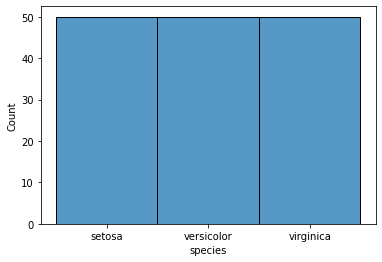

In [2]:
import seaborn as sbn

sbn.histplot(x=df['species'])


On vérifie le mode pour identifier la classe prédominante

In [3]:
print(f"Mode : {df['species'].mode()}")

Mode : 0        setosa
1    versicolor
2     virginica
dtype: object


Les classes sont équilibrées.

##Z-score des données

In [4]:

df_z_scores = ((df - df.mean())/df.std()).drop(columns='species')
df_z_scores

petal length (cm)  petal width (cm)  sepal length (cm)  sepal width (cm)
0            -1.335752         -1.311052          -0.897674          1.015602
1            -1.335752         -1.311052          -1.139200         -0.131539
2            -1.392399         -1.311052          -1.380727          0.327318
3            -1.279104         -1.311052          -1.501490          0.097889
4            -1.335752         -1.311052          -1.018437          1.245030
..                 ...               ...                ...               ...
145           0.816859          1.443994           1.034539         -0.131539
146           0.703564          0.919223           0.551486         -1.278680
147           0.816859          1.050416           0.793012         -0.131539
148           0.930154          1.443994           0.430722          0.786174
149           0.760211          0.788031           0.068433         -0.131539

[150 rows x 4 columns]

In [5]:
df_z_scores.describe()

petal length (cm)  petal width (cm)  sepal length (cm)  sepal width (cm)
count       1.500000e+02      1.500000e+02       1.500000e+02      1.500000e+02
mean       -1.292300e-15     -5.543714e-16      -1.457168e-15     -1.638319e-15
std         1.000000e+00      1.000000e+00       1.000000e+00      1.000000e+00
min        -1.562342e+00     -1.442245e+00      -1.863780e+00     -2.425820e+00
25%        -1.222456e+00     -1.179859e+00      -8.976739e-01     -5.903951e-01
50%         3.353541e-01      1.320673e-01      -5.233076e-02     -1.315388e-01
75%         7.602115e-01      7.880307e-01       6.722490e-01      5.567457e-01
max         1.779869e+00      1.706379e+00       2.483699e+00      3.080455e+00

In [6]:
df_z_scores[(df_z_scores > 3)].count() + df_z_scores[(df_z_scores < -3)].count()

petal length (cm)    0
petal width (cm)     0
sepal length (cm)    0
sepal width (cm)     1
dtype: int64

Une valeur aberrante pour sepal width avec un max zscore > 3

##Box plot par espèce

On veut voir si la discrimination entre les espèces sera facile non

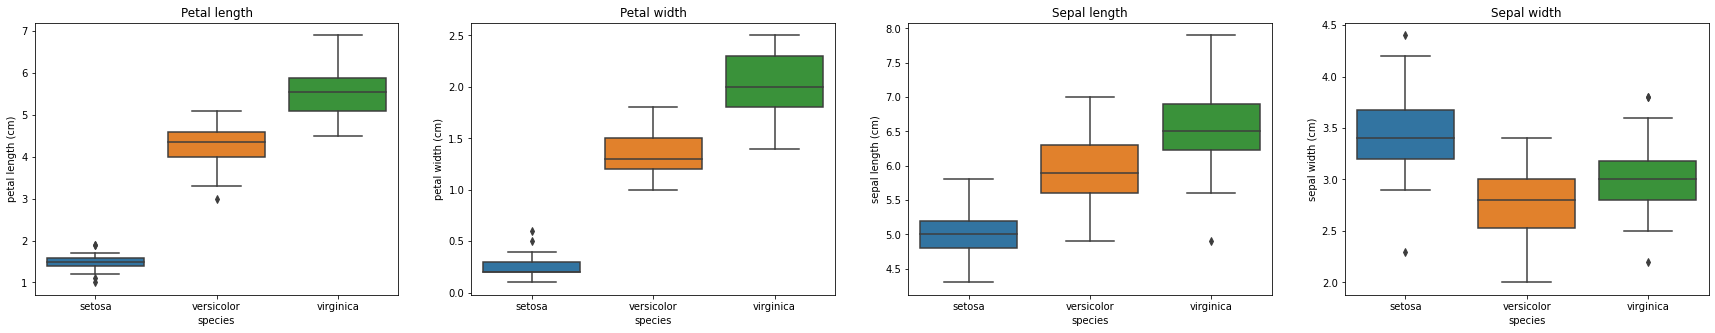

In [7]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 4, sharex=False, figsize=(30,5))
axes[0].set_title('Petal length')
axes[1].set_title('Petal width')
axes[2].set_title('Sepal length')
axes[3].set_title('Sepal width')

sbn.boxplot(x='species', y='petal length (cm)', data=df, ax=axes[0])
sbn.boxplot(x='species', y='petal width (cm)', data=df, ax=axes[1])
sbn.boxplot(x='species', y='sepal length (cm)', data=df, ax=axes[2])
sbn.boxplot(x='species', y='sepal width (cm)', data=df, ax=axes[3])

plt.subplots_adjust(hspace = 0.8)

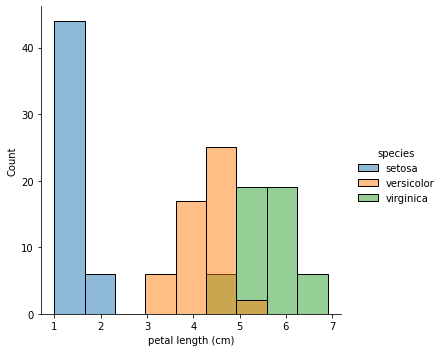

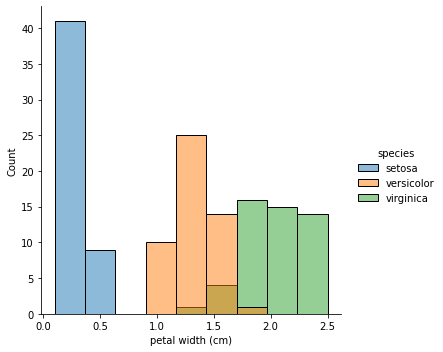

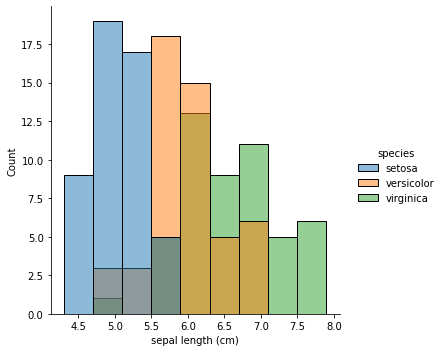

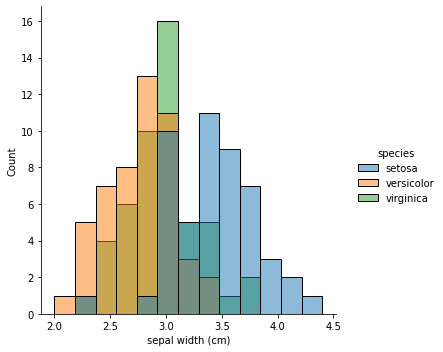

In [8]:


sbn.displot(data=df, hue='species', x='petal length (cm)')
sbn.displot(data=df, hue='species', x='petal width (cm)')
sbn.displot(data=df, hue='species', x='sepal length (cm)')
sbn.displot(data=df, hue='species', x='sepal width (cm)')

plt.subplots_adjust(hspace = 0.8)

##Corrélations

Il ne doit pas y avoir de corrélations trop fortes entre les prédicteurs. On ne veut pas de relation linéaire trop élevée entre les prédicteurs.

Setosa

In [9]:
# Tableau des corrélations
df.drop(columns='species')[df['species'] == 'setosa'].corr()

sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.278098
sepal width (cm)            0.742547  ...          0.232752
petal length (cm)           0.267176  ...          0.331630
petal width (cm)            0.278098  ...          1.000000

[4 rows x 4 columns]

Versicolor

In [10]:
df.drop(columns='species')[df['species'] == 'versicolor'].corr()

sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.546461
sepal width (cm)            0.525911  ...          0.663999
petal length (cm)           0.754049  ...          0.786668
petal width (cm)            0.546461  ...          1.000000

[4 rows x 4 columns]

Virginica

In [11]:
df.drop(columns='species')[df['species'] == 'virginica'].corr()

sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.281108
sepal width (cm)            0.457228  ...          0.537728
petal length (cm)           0.864225  ...          0.322108
petal width (cm)            0.281108  ...          1.000000

[4 rows x 4 columns]

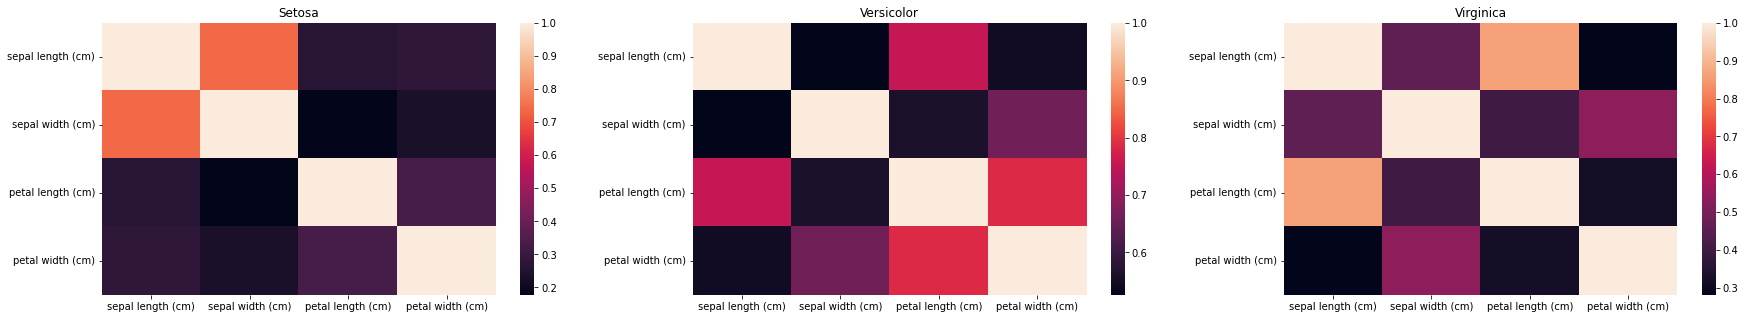

In [12]:
# Heatmap des corrélations

fig, axes = plt.subplots(1, 3, sharex=False, figsize=(30,5))
axes[0].set_title('Setosa')
axes[1].set_title('Versicolor')
axes[2].set_title('Virginica')

sbn.heatmap(df.drop(columns='species')[df['species'] == 'setosa'].corr(), ax=axes[0])
sbn.heatmap(df.drop(columns='species')[df['species'] == 'versicolor'].corr(), ax=axes[1])
sbn.heatmap(df.drop(columns='species')[df['species'] == 'virginica'].corr(), ax=axes[2])

plt.subplots_adjust(hspace = 0.8)

#2 - Préparer les données

Activité :

- Transformer les données cibles pour de la classification binaire : Setosa ou pas Setosa ?

- Créer un jeu de données d'entrainement et un jeu de données de test

- Standardiser les données

- Tracer les boites à moustaches (box plot) pour la classe positive et negative. Pensez-vous que les résultats de la prédiction vont être bons ?

##Transformation données cibles 

In [13]:
df['species_binaire'] = df['species'].map({'setosa' : 0, 'versicolor' : 1, 'virginica' : 1})
df['species_binaire']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species_binaire, Length: 150, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
 5   species_binaire    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#3 - Entrainer et évaluer le modèle

- Entrainer le modèle de régression logistique : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Afficher la matrice de confusion

- Afficher la justesse, la précision, le rappel et le F1-score

- Effectuer une prédiction sur une nouvelle donnée

- Exporter le modèle entrainé dans un fichier `iris.joblib`

##Régression logistique

###Split données entraînement / test

In [15]:
X = df.drop(columns=['species', 'species_binaire'])
y = df['species_binaire']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

###Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

scaler = StandardScaler()
# Enregistrement de la standardisation dans l'objet scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###Entraînement

In [18]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression().fit(X_train, y_train)

###Matrice de confusion

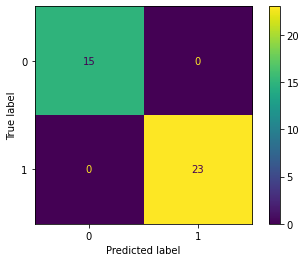

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

predictions = reg_log.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test)
plt.show()


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Justesse = accuracy
print(f"Justesse (accuracy) : {reg_log.score(X_test, y_test)}")
print(f"Précision : {precision_score(y_test, predictions)}")
print(f"Recall : {recall_score(y_test, predictions)}")
print(f"F1_score : {f1_score(y_test, predictions)}")

Justesse (accuracy) : 1.0
Précision : 1.0
Recall : 1.0
F1_score : 1.0


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        23

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



###Prédiction nouvelle donnée

In [22]:
#@title  { run: "auto", vertical-output: true }
sepal_length =  2#@param {type:"number"}
sepal_width = 2 #@param {type:"number"}
petal_length = 2 #@param {type:"number"}
petal_width =  2#@param {type:"number"}


new_pred = reg_log.predict(scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]]))
if new_pred[0] == 0:
  new_pred = 'setosa'
else:
  new_pred = 'pas setosa'

print(f"Prédiction : {new_pred}")


Prédiction : pas setosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


###Prédiction nouvelle donnée avec probas

In [23]:
#@title  { run: "auto", vertical-output: true }
sepal_length = 2#@param {type:"number"}
sepal_width =  2#@param {type:"number"}
petal_length = 2 #@param {type:"number"}
petal_width =  2#@param {type:"number"}

new_pred = reg_log.predict_proba(scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]]))


print(f"Proba setosa : {new_pred[0][0]}")
print(f"Proba pas setosa : {new_pred[0][1]}")

Proba setosa : 0.3572516810168124
Proba pas setosa : 0.6427483189831876


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


###Exportation du modèle

In [24]:
from joblib import dump, load
dump(reg_log, 'iris.joblib')
dump(scaler, 'scaler_iris.joblib')

['iris.joblib']

#4 - Comparaison avec d'autres données

- Entrainer un autre modèle pour différentier les iris versicolor des iris qui ne sont pas versicolor ?

In [25]:
# Remplacement valeurs species pour classification binaire
df['species_binaire_2'] = df['species'].map({'versicolor' : 0, 'setosa' : 1, 'virginica' : 1})
# Variable cible
y2 = df['species_binaire_2']

# Split données entraînement / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y2, test_size=0.25, random_state=42)

# Standardization
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement
reg_log_2 = LogisticRegression().fit(X_train, y_train)


##Matrice de confusion

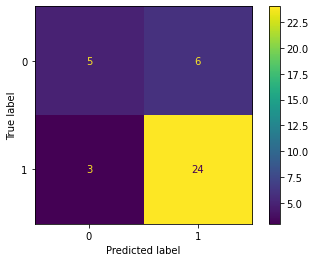

In [26]:
predictions2 = reg_log_2.predict(X_test)
cm2 = metrics.confusion_matrix(y_test, predictions2)
ConfusionMatrixDisplay.from_estimator(reg_log_2, X_test, y_test)
plt.show()

##Métrics d'évaluation

In [27]:
print(f"Justesse (accuracy) : {reg_log_2.score(X_test, y_test)}")
print(f"Précision : {precision_score(y_test, predictions2)}")
print(f"Recall : {recall_score(y_test, predictions2)}")
print(f"F1_score : {f1_score(y_test, predictions2)}")

Justesse (accuracy) : 0.7631578947368421
Précision : 0.8
Recall : 0.8888888888888888
F1_score : 0.8421052631578948


In [28]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.80      0.89      0.84        27

    accuracy                           0.76        38
   macro avg       0.71      0.67      0.68        38
weighted avg       0.75      0.76      0.75        38



#5- Multiclass

##Split

In [29]:
y_multi = df['species']

# Split données entraînement / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_multi, test_size=0.25, random_state=42)


##Scaling

In [30]:
scaler = StandardScaler()
# Enregistrement de la standardisation dans l'objet scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##Confusion matrix

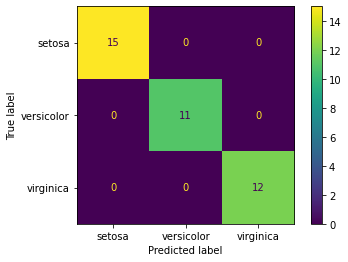

In [46]:
reg_log_multi = LogisticRegression(multi_class='auto').fit(X_train, y_train)
pred_multi = reg_log_multi.predict(X_test)
ConfusionMatrixDisplay.from_estimator(reg_log_multi, X_test, y_test)

##Metrics

In [41]:
print(classification_report(y_test, pred_multi))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



##Prediction with probability

In [47]:
#@title  { run: "auto", vertical-output: true }
sepal_length = 2#@param {type:"number"}
sepal_width =  2#@param {type:"number"}
petal_length = 2 #@param {type:"number"}
petal_width =  2#@param {type:"number"}

pred_proba_multi = reg_log_multi.predict_proba(scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]]))


print(f"Proba setosa : {pred_proba_multi[0][0]}")
print(f"Proba versicolor : {pred_proba_multi[0][1]}")
print(f"Proba virginica : {pred_proba_multi[0][2]}")


Proba setosa : 0.834770691798133
Proba versicolor : 0.13445764918230077
Proba virginica : 0.03077165901956612


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
